In [2]:
import os
def getAllmanual():
    dirt = dict()
    zobristPath = "Zobrist"
    zobristFiles = os.listdir(zobristPath)
    boardPath = "Board"
    boardFiles = os.listdir(boardPath)
    for zobristFile,boardFile in zip(zobristFiles,boardFiles):
        zobristFile = zobristPath + '\\' + zobristFile
        boardFile = boardPath + '\\' + boardFile
        with open(zobristFile,'r') as f:
            zobrist = f.read()
        with open(boardFile,'r') as f:
            board = f.read()
        zobrist = zobrist.split('\n')[:-1]
        board = board.split('\n')[:-1]
        for i,j in zip(zobrist,board):
            dirt[i] = j
    return dirt
manualDirt = getAllmanual()

<Figure size 400x400 with 0 Axes>

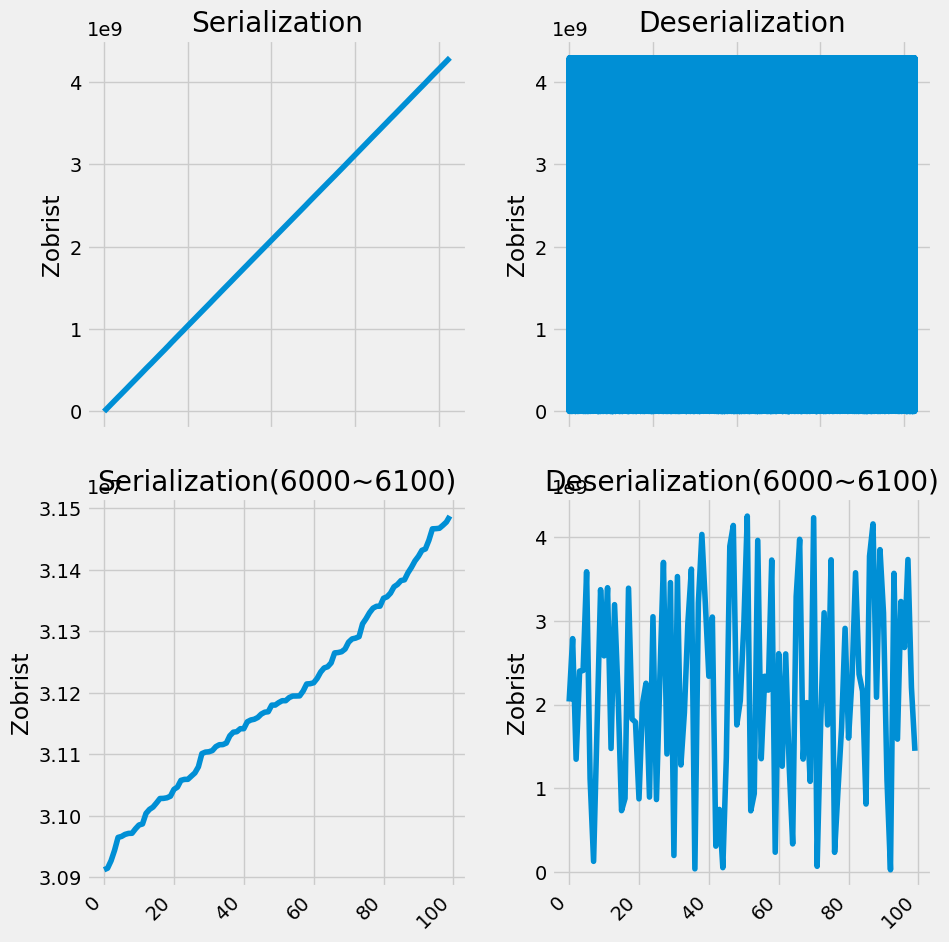

In [29]:
from matplotlib import pyplot as plt
fig = plt.figure(1,figsize=(4,4))
y = list(map(int,manualDirt.keys()))
y2 = []
for i in y:
    y2.append(i)
y.sort()

# fig = plt.figure(1,figsize=(5,5))
# plt.plot(range(len(y2[:10])),y2[:10])
# plt.show()

# plt.style.use('fivethirtyeight')

# 设置布局
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    nrows=2, ncols=2, figsize=(10, 10))
fig.autofmt_xdate(rotation=45)

ax1.plot(range(len(y)), y)
ax1.set_xlabel('')
ax1.set_ylabel("Zobrist")
ax1.set_title("Serialization")

ax2.plot(range(len(y2)), y2)
ax2.set_xlabel('')
ax2.set_ylabel("Zobrist")
ax2.set_title("Deserialization")

ax3.plot(range(len(y[6000:6100])), y[6000:6100])
ax3.set_xlabel('')
ax3.set_ylabel("Zobrist")
ax3.set_title("Serialization(6000~6100)")

# 朋友预测
ax4.plot(range(len(y2[6000:6100])), y2[6000:6100])
ax4.set_xlabel('')
ax4.set_ylabel("Zobrist")
ax4.set_title("Deserialization(6000~6100)")

plt.tight_layout(pad=2)


In [25]:
import os
import numpy as np
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch

zobristPath = "Zobrist"
zobristFiles = os.listdir(zobristPath)
boardPath = "Board"
boardFiles = os.listdir(boardPath)


def conveyBoard(board):
    inputs = np.zeros((10, 9), dtype=float)
    k = 0
    for i in range(10):
        for j in range(9):
            inputs[i, j] = board[k]
            k += 1
    return inputs

def getManual(zobristFile, boardFile):
    dirt = dict()
    zobristFile = zobristPath + '\\' + zobristFile
    boardFile = boardPath + '\\' + boardFile
    with open(zobristFile, 'r') as f:
        zobrist = f.read()
    with open(boardFile, 'r') as f:
        board = f.read()
    zobrist = zobrist.split('\n')[1:-1]
    board = board.split('\n')[:-2]
    for i, j in zip(zobrist, board):
        dirt[i] = j
    return dirt

for zobristFile,boardFile in zip(zobristFiles,boardFiles):
    manualDirt = getManual(zobristFile,boardFile)
    lengths = len(manualDirt)
    zobrist = list(map(float,manualDirt.keys()))
    board = list(manualDirt.values())
    inputs_list = []
    outputs_list = []
    redTime = True
    for i in range(lengths):
        inputs = np.zeros((5,10,9),dtype=float)
        if redTime:
            inputs[4,:,:] = np.ones((10,9),dtype=float)
        for j,k in zip(range(i,i-4,-1),range(4)):
            if j < 0:
                inputs[k,:,:] = np.zeros((10,9),dtype=float)
            else:
                inputs[k,:,:] = conveyBoard(board[j].split(" ")[:-1])
        inputs_list.append(inputs)
        outputs_list.append(zobrist[i])
        redTime = not redTime

    inputs,outputs = map(torch.tensor,(inputs_list,outputs_list))
    train_data = TensorDataset(inputs,outputs)
    train_data = DataLoader(dataset=train_data,batch_size=4,shuffle=False,num_workers=4,drop_last=False)
    

KeyboardInterrupt: 

In [4]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter("logs")
for i in range(100):
    writer.add_scalar("y=x",i,i)
writer.close()